In [1]:
# Import packages/data

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from sklearn.metrics import mean_squared_error

train = pd.read_csv('train.csv')
valid = pd.read_csv('valid.csv')
test = pd.read_csv('test.csv')

train['date'] = pd.to_datetime(train['date'])
valid['date'] = pd.to_datetime(valid['date'])
test['date'] = pd.to_datetime(test['date'])

train

,item_id,dept_id,cat_id,date,day,month,year,wm_yr_wk,weekday,event_name_1,event_type_1,event_name_2,event_type_2,snap_CA,sell_price,units_sold
0,HOBBIES_1_001,HOBBIES_1,HOBBIES,2013-07-13,13,7,2013,11325,Saturday,None,None,None,None,0,9.58,0
1,HOBBIES_1_001,HOBBIES_1,HOBBIES,2013-07-14,14,7,2013,11325,Sunday,None,None,None,None,0,9.58,0
2,HOBBIES_1_001,HOBBIES_1,HOBBIES,2013-07-15,15,7,2013,11325,Monday,None,None,None,None,0,9.58,0
3,HOBBIES_1_001,HOBBIES_1,HOBBIES,2013-07-16,16,7,2013,11325,Tuesday,None,None,None,None,0,9.58,0
4,HOBBIES_1_001,HOBBIES_1,HOBBIES,2013-07-17,17,7,2013,11325,Wednesday,None,None,None,None,0,9.58,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130464,HOBBIES_1_104,HOBBIES_1,HOBBIES,2015-12-12,12,12,2015,11546,Saturday,None,None,None,None,0,23.98,1
130465,HOBBIES_1_104,HOBBIES_1,HOBBIES,2015-12-13,13,12,2015,11546,Sunday,None,None,None,None,0,23.98,0
130466,HOBBIES_1_104,HOBBIES_1,HOBBIES,2015-12-14,14,12,2015,11546,Monday,Chanukah End,Religious,None,None,0,23.98,0
130467,HOBBIES_1_104,HOBBIES_1,HOBBIES,2015-12-15,15,12,2015,11546,Tuesday,None,None,None,None,0,23.98,0


In [2]:
# Monthly units sold

train_monthly_units_sold = train.groupby(['item_id','year','month'])['units_sold'].sum().reset_index()
valid_monthly_units_sold = valid.groupby(['item_id','year','month'])['units_sold'].sum().reset_index()
test_monthly_units_sold = test.groupby(['item_id','year','month'])['units_sold'].sum().reset_index()


train_monthly_units_sold

,item_id,year,month,units_sold
0,HOBBIES_1_001,2013,7,1
1,HOBBIES_1_001,2013,8,13
2,HOBBIES_1_001,2013,9,14
3,HOBBIES_1_001,2013,10,15
4,HOBBIES_1_001,2013,11,21
...,...,...,...,...
4385,HOBBIES_1_104,2015,8,11
4386,HOBBIES_1_104,2015,9,3
4387,HOBBIES_1_104,2015,10,2
4388,HOBBIES_1_104,2015,11,8


In [3]:
# Monthly mean sell price

train_monthly_mean_sell_price = train.groupby(['item_id','year','month'])['sell_price'].mean().reset_index()
train_monthly_mean_sell_price = train_monthly_mean_sell_price.rename(columns={'sell_price':'avg_sell_price'})

valid_monthly_mean_sell_price = valid.groupby(['item_id','year','month'])['sell_price'].mean().reset_index()
valid_monthly_mean_sell_price = valid_monthly_mean_sell_price.rename(columns={'sell_price':'avg_sell_price'})

test_monthly_mean_sell_price = test.groupby(['item_id','year','month'])['sell_price'].mean().reset_index()
test_monthly_mean_sell_price = test_monthly_mean_sell_price.rename(columns={'sell_price':'avg_sell_price'})

train_monthly_mean_sell_price

,item_id,year,month,avg_sell_price
0,HOBBIES_1_001,2013,7,9.232632
1,HOBBIES_1_001,2013,8,8.260000
2,HOBBIES_1_001,2013,9,8.260000
3,HOBBIES_1_001,2013,10,8.260000
4,HOBBIES_1_001,2013,11,8.260000
...,...,...,...,...
4385,HOBBIES_1_104,2015,8,23.980000
4386,HOBBIES_1_104,2015,9,23.980000
4387,HOBBIES_1_104,2015,10,23.980000
4388,HOBBIES_1_104,2015,11,23.980000


In [5]:
# Merge monthly units sold with mean sell price

train_new = train_monthly_units_sold.merge(train_monthly_mean_sell_price,on=['item_id','year','month'])
valid_new = valid_monthly_units_sold.merge(valid_monthly_mean_sell_price,on=['item_id','year','month'])
test_new = test_monthly_units_sold.merge(test_monthly_mean_sell_price,on=['item_id','year','month'])

train_new

,item_id,year,month,units_sold,avg_sell_price
0,HOBBIES_1_001,2013,7,1,9.232632
1,HOBBIES_1_001,2013,8,13,8.260000
2,HOBBIES_1_001,2013,9,14,8.260000
3,HOBBIES_1_001,2013,10,15,8.260000
4,HOBBIES_1_001,2013,11,21,8.260000
...,...,...,...,...,...
4385,HOBBIES_1_104,2015,8,11,23.980000
4386,HOBBIES_1_104,2015,9,3,23.980000
4387,HOBBIES_1_104,2015,10,2,23.980000
4388,HOBBIES_1_104,2015,11,8,23.980000


In [7]:
################################################################################################################################

In [8]:
# units_sold_monthly_mean feature engineering

In [9]:
# Determine mean units sold for a given item, in a given month, by averaging sales of product in given month over all years

train_mean_monthly_sales = train_monthly_units_sold.groupby(['item_id','month'])['units_sold'].mean().reset_index()
train_mean_monthly_sales = train_mean_monthly_sales.rename(columns={"units_sold":"units_sold_monthly_mean"})

valid_mean_monthly_sales = valid_monthly_units_sold.groupby(['item_id','month'])['units_sold'].mean().reset_index()
valid_mean_monthly_sales = valid_mean_monthly_sales.rename(columns={"units_sold":"units_sold_monthly_mean"})

train_mean_monthly_sales

,item_id,month,units_sold_monthly_mean
0,HOBBIES_1_001,1,16.0
1,HOBBIES_1_001,2,16.5
2,HOBBIES_1_001,3,17.5
3,HOBBIES_1_001,4,15.0
4,HOBBIES_1_001,5,6.5
...,...,...,...
1195,HOBBIES_1_104,8,10.5
1196,HOBBIES_1_104,9,8.5
1197,HOBBIES_1_104,10,7.5
1198,HOBBIES_1_104,11,8.5


In [10]:
# Add new features to train/validation/test dfs (NOTICE: test monthly means are taken to be train monthly means!)

train_new = train_new.reset_index()
train_new = train_new.merge(train_mean_monthly_sales,on=['item_id','month'])
train_new = train_new.sort_values(by='index')
train_new = train_new.drop(columns='index')

valid_new = valid_new.reset_index()
valid_new = valid_new.merge(valid_mean_monthly_sales,on=['item_id','month'])
valid_new = valid_new.sort_values(by='index')
valid_new = valid_new.drop(columns='index')

test_new = test_new.reset_index()
test_new = test_new.merge(train_mean_monthly_sales,on=['item_id','month'])
test_new = test_new.sort_values(by='index')
test_new = test_new.drop(columns='index')

train_new

,item_id,year,month,units_sold,avg_sell_price,units_sold_monthly_mean
0,HOBBIES_1_001,2013,7,1,9.232632,11.666667
3,HOBBIES_1_001,2013,8,13,8.260000,17.000000
6,HOBBIES_1_001,2013,9,14,8.260000,18.666667
9,HOBBIES_1_001,2013,10,15,8.260000,15.666667
12,HOBBIES_1_001,2013,11,21,8.260000,20.000000
...,...,...,...,...,...,...
4379,HOBBIES_1_104,2015,8,11,23.980000,10.500000
4381,HOBBIES_1_104,2015,9,3,23.980000,8.500000
4383,HOBBIES_1_104,2015,10,2,23.980000,7.500000
4385,HOBBIES_1_104,2015,11,8,23.980000,8.500000


In [11]:
################################################################################################################################

In [12]:
# monthly_rolling_mean feature engineering

In [13]:
# Rolling mean for train

ids = train_new.item_id.unique()
window = 3

df_new = train_new.copy()
df_new['monthly_rolling_mean_'+str(window)] = 0

df_new2 = df_new[df_new['item_id']==ids[0]]
df_new2['monthly_rolling_mean_'+str(window)] = df_new2['units_sold'].rolling(window,closed='left').mean()
df_new2 = df_new2.where(pd.notnull(df_new2), 0)

for i in range(1,len(ids)):
    
    df_dummy = df_new[df_new['item_id']==ids[i]]
    df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
    df_dummy = df_dummy.where(pd.notnull(df_dummy), 0)
    
    df_new2 = pd.concat([df_new2,df_dummy])

train_new = df_new2.copy()
train_new

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\42413486.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2['monthly_rolling_mean_'+str(window)] = df_new2['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\42413486.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\42413486.py:14: SettingWi

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\42413486.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\42413486.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\42413486.py:14: Settin

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\42413486.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\42413486.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\42413486.py:14: Settin

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\42413486.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\42413486.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\42413486.py:14: Settin

,item_id,year,month,units_sold,avg_sell_price,units_sold_monthly_mean,monthly_rolling_mean_3
0,HOBBIES_1_001,2013,7,1,9.232632,11.666667,0.000000
3,HOBBIES_1_001,2013,8,13,8.260000,17.000000,0.000000
6,HOBBIES_1_001,2013,9,14,8.260000,18.666667,0.000000
9,HOBBIES_1_001,2013,10,15,8.260000,15.666667,9.333333
12,HOBBIES_1_001,2013,11,21,8.260000,20.000000,14.000000
...,...,...,...,...,...,...,...
4379,HOBBIES_1_104,2015,8,11,23.980000,10.500000,6.333333
4381,HOBBIES_1_104,2015,9,3,23.980000,8.500000,7.000000
4383,HOBBIES_1_104,2015,10,2,23.980000,7.500000,6.333333
4385,HOBBIES_1_104,2015,11,8,23.980000,8.500000,5.333333


In [14]:
# Rolling mean for valid

df_new = valid_new.copy()
df_new['monthly_rolling_mean_'+str(window)] = 0

df_new2 = df_new[df_new['item_id']==ids[0]]
df_new2['monthly_rolling_mean_'+str(window)] = df_new2['units_sold'].rolling(window,closed='left').mean()
df_new2 = df_new2.where(pd.notnull(df_new2), 0)

for i in range(1,len(ids)):
    
    df_dummy = df_new[df_new['item_id']==ids[i]]
    df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
    df_dummy = df_dummy.where(pd.notnull(df_dummy), 0)
    
    df_new2 = pd.concat([df_new2,df_dummy])

valid_new = df_new2.copy()
valid_new

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\4034422530.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_new2['monthly_rolling_mean_'+str(window)] = df_new2['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\4034422530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\4034422530.py:11: Set

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\4034422530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\4034422530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\4034422530.py:11: 

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\4034422530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\4034422530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\4034422530.py:11: 

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\4034422530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\4034422530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\4034422530.py:11: 

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\4034422530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\4034422530.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_dummy['monthly_rolling_mean_'+str(window)] = df_dummy['units_sold'].rolling(window,closed='left').mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\4034422530.py:11: 

,item_id,year,month,units_sold,avg_sell_price,units_sold_monthly_mean,monthly_rolling_mean_3
0,HOBBIES_1_001,2015,10,3,8.26,3.0,0.000000
1,HOBBIES_1_001,2015,11,17,8.26,17.0,0.000000
2,HOBBIES_1_001,2015,12,22,8.26,22.0,0.000000
3,HOBBIES_1_001,2016,1,24,8.26,24.0,14.000000
4,HOBBIES_1_001,2016,2,4,8.26,4.0,21.000000
...,...,...,...,...,...,...,...
645,HOBBIES_1_103,2015,11,46,0.70,46.0,135.000000
646,HOBBIES_1_104,2015,12,8,23.98,8.0,0.000000
647,HOBBIES_1_104,2016,1,10,23.98,10.0,0.000000
648,HOBBIES_1_104,2016,2,10,23.98,10.0,0.000000


In [15]:
################################################################################################################################

In [16]:
# Create train/validation/test X and y

cols_to_drop = ['month','year']

train_df = train_new.drop(columns=cols_to_drop)
X_train = train_df.drop(columns='units_sold')
y_train = train_df['units_sold']

valid_df = valid_new.drop(columns=cols_to_drop)
X_valid = valid_df.drop(columns='units_sold')
y_valid = valid_df['units_sold']

test_df = test_new.drop(columns=cols_to_drop)
X_test = test_df.drop(columns='units_sold')
y_test = test_df['units_sold']

train_df

,item_id,units_sold,avg_sell_price,units_sold_monthly_mean,monthly_rolling_mean_3
0,HOBBIES_1_001,1,9.232632,11.666667,0.000000
3,HOBBIES_1_001,13,8.260000,17.000000,0.000000
6,HOBBIES_1_001,14,8.260000,18.666667,0.000000
9,HOBBIES_1_001,15,8.260000,15.666667,9.333333
12,HOBBIES_1_001,21,8.260000,20.000000,14.000000
...,...,...,...,...,...
4379,HOBBIES_1_104,11,23.980000,10.500000,6.333333
4381,HOBBIES_1_104,3,23.980000,8.500000,7.000000
4383,HOBBIES_1_104,2,23.980000,7.500000,6.333333
4385,HOBBIES_1_104,8,23.980000,8.500000,5.333333


In [17]:
# Define categorical features

cat_columns = ['item_id']
print("Names of categorical columns : ", cat_columns)

cat_idx = [X_train.columns.get_loc(col) for col in cat_columns]
print("Indices of categorical columns : ",cat_idx)

Names of categorical columns :  ['item_id']
Indices of categorical columns :  [0]


In [18]:
# Import the Pool class from catboost and use it for train/validation split

from catboost import Pool


train_data = Pool(data=X_train,
                  label=y_train,
                  cat_features=cat_idx
                 )

valid_data = Pool(data=X_valid,
                  label=y_valid,
                  cat_features=cat_idx
                 )

C:\Users\16479\anaconda3\lib\site-packages\xgboost\compat.py:36: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index


In [19]:
# Create catboost model and train it

from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV

model = CatBoostRegressor(random_seed=2022, iterations=100, learning_rate=0.1)
model.fit(train_data, eval_set=valid_data)

# model = CatBoostRegressor(random_seed=2022)

# parameters = {'depth':[4,6,8,10],
#              'learning_rate':[0.01,0.05,0.1,0.5],
#               'iterations':[10,25,50,75,100]
#              }

# Grid_CBC = GridSearchCV(estimator=model, param_grid = parameters, cv = 2, n_jobs=-1)
# Grid_CBC.fit(X_train, y_train)
# Grid_CBC.best_params_

0:	learn: 54.3496518	test: 55.4572179	best: 55.4572179 (0)	total: 162ms	remaining: 16s
1:	learn: 50.4444529	test: 52.5290514	best: 52.5290514 (1)	total: 194ms	remaining: 9.51s
2:	learn: 46.8337059	test: 49.9545649	best: 49.9545649 (2)	total: 231ms	remaining: 7.46s
3:	learn: 43.7077950	test: 47.5598213	best: 47.5598213 (3)	total: 268ms	remaining: 6.43s
4:	learn: 40.9224255	test: 45.2493789	best: 45.2493789 (4)	total: 302ms	remaining: 5.74s
5:	learn: 38.4617697	test: 43.4449968	best: 43.4449968 (5)	total: 334ms	remaining: 5.23s
6:	learn: 36.3468084	test: 41.7772438	best: 41.7772438 (6)	total: 361ms	remaining: 4.8s
7:	learn: 34.4218779	test: 40.1071634	best: 40.1071634 (7)	total: 382ms	remaining: 4.4s
8:	learn: 32.8140392	test: 38.5853295	best: 38.5853295 (8)	total: 427ms	remaining: 4.31s
9:	learn: 31.3630312	test: 37.6930611	best: 37.6930611 (9)	total: 448ms	remaining: 4.03s
10:	learn: 30.1037750	test: 36.2547446	best: 36.2547446 (10)	total: 478ms	remaining: 3.87s
11:	learn: 28.9797793	t

92:	learn: 18.9601888	test: 25.5289048	best: 25.4839680 (85)	total: 3.28s	remaining: 247ms
93:	learn: 18.9312283	test: 25.4266020	best: 25.4266020 (93)	total: 3.31s	remaining: 211ms
94:	learn: 18.9022940	test: 25.3728415	best: 25.3728415 (94)	total: 3.33s	remaining: 175ms
95:	learn: 18.8662153	test: 25.3430560	best: 25.3430560 (95)	total: 3.36s	remaining: 140ms
96:	learn: 18.8282854	test: 25.2991308	best: 25.2991308 (96)	total: 3.39s	remaining: 105ms
97:	learn: 18.7890958	test: 25.3021949	best: 25.2991308 (96)	total: 3.42s	remaining: 69.8ms
98:	learn: 18.7756942	test: 25.3320263	best: 25.2991308 (96)	total: 3.44s	remaining: 34.8ms
99:	learn: 18.7209289	test: 25.3024187	best: 25.2991308 (96)	total: 3.47s	remaining: 0us

bestTest = 25.29913077
bestIteration = 96

Shrink model to first 97 iterations.


Text(0.5, 1.0, 'Feature Importance')

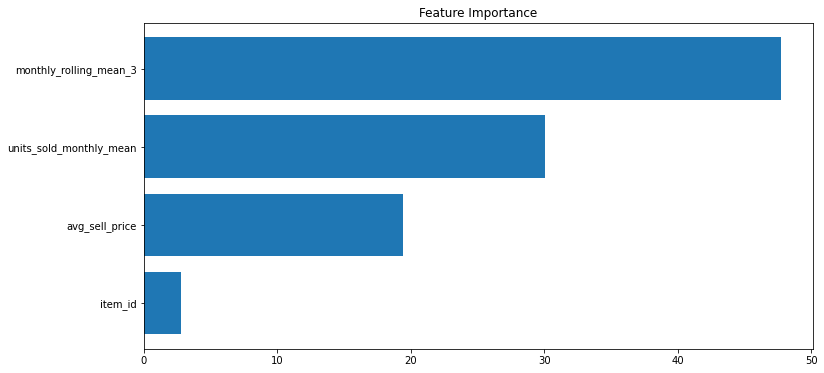

In [20]:
# Feature importance plot

feature_importance = model.feature_importances_
sorted_idx = np.argsort(feature_importance)

fig = plt.figure(figsize=(12, 6))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), np.array(X_train.columns)[sorted_idx])
plt.title('Feature Importance')

In [21]:
################################################################################################################################

In [36]:
# Determine which product predictions beat naive model

ids = train.item_id.unique()

output = []
skipped = []

for ID in ids:

    X_test['monthly_rolling_mean_'+str(window)] = 0

    X_test_single = X_test[X_test['item_id']==ID].reset_index().drop(columns='index')

    valid_single = valid_df[valid_df['item_id']==ID]

    x = X_test_single.iloc[[0]]
    x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
    X_test_single = X_test_single.drop(index=0)
    X_test_single = pd.concat([x,X_test_single])
    
    if valid_single.shape[0] < window or X_test_single.shape[0] < window + 1:
        
        skipped.append(ID)
        
    else:

        y_pred = []

        for i in range(0,window):

            x = X_test_single.iloc[[i]]

            if i!=0:
                x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window

            y = model.predict(x)[0]
            y_pred.append(y)

            prev_sales = valid_single.tail(window-(i+1))['units_sold'].to_numpy()

        rows = X_test_single.shape[0]

        for i in range(window,rows):
            x = X_test_single.iloc[[i]]
            x['monthly_rolling_mean_'+str(window)] = np.sum(y_pred[i-window:i])/window
            y = model.predict(x)[0]
            y_pred.append(y)

        single_item_actuals_df = test_df[test_df['item_id']==ID]
        y_actual = single_item_actuals_df['units_sold'].to_numpy()

        naive_window = 6

        y_naive = valid_single.tail(naive_window).units_sold.mean()*np.ones(len(y_actual))

        y_pred_MSE = round(mean_squared_error(y_actual,y_pred),3)
        y_naive_MSE = round(mean_squared_error(y_actual,y_naive),3)

        if y_pred_MSE < y_naive_MSE:
            output.append(ID)

output

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:45: SettingWithCopyWarning: 
A value is trying to

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = np.sum(y_pred[i-window:i])/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:34: SettingWithCopyWarning: 
A value is trying to be set on 

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:45: SettingWithCopyWarning: 
A value is trying to

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = np.sum(y_pred[i-window:i])/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:17: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = np.sum(y_pred[i-window:i])/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:17: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:45: SettingWithCopyWarning: 
A value is trying to

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = np.sum(y_pred[i-window:i])/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:34: SettingWithCopyWarning: 
A value is trying to be set on 

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:45: SettingWithCopyWarning: 
A value is trying to

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:45: SettingWithCopyWarning: 
A value is trying to

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:45: SettingWithCopyWarning: 
A value is trying to

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:45: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = np.sum(y_pred[i-window:i])/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:17: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:45: SettingWithCopyWarning: 
A value is trying to

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:45: SettingWithCopyWarning: 
A value is trying to

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:34: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\1757656999.py:45: SettingWithCopyWarning: 
A value is trying to

['HOBBIES_1_001',
 'HOBBIES_1_002',
 'HOBBIES_1_003',
 'HOBBIES_1_006',
 'HOBBIES_1_007',
 'HOBBIES_1_013',
 'HOBBIES_1_015',
 'HOBBIES_1_017',
 'HOBBIES_1_019',
 'HOBBIES_1_023',
 'HOBBIES_1_026',
 'HOBBIES_1_027',
 'HOBBIES_1_028',
 'HOBBIES_1_031',
 'HOBBIES_1_034',
 'HOBBIES_1_036',
 'HOBBIES_1_038',
 'HOBBIES_1_041',
 'HOBBIES_1_042',
 'HOBBIES_1_052',
 'HOBBIES_1_054',
 'HOBBIES_1_055',
 'HOBBIES_1_057',
 'HOBBIES_1_062',
 'HOBBIES_1_064',
 'HOBBIES_1_067',
 'HOBBIES_1_068',
 'HOBBIES_1_070',
 'HOBBIES_1_073',
 'HOBBIES_1_074',
 'HOBBIES_1_076',
 'HOBBIES_1_077',
 'HOBBIES_1_078',
 'HOBBIES_1_094',
 'HOBBIES_1_102',
 'HOBBIES_1_103']

In [37]:
# Percentage of products where predictions beat naive model

len(output)/(len(ids)-len(skipped))

0.375

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:41: SettingWithCopyWarning: 
A value is trying to

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:41: SettingWithCopyWarning: 
A value is trying to

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:41: SettingWithCopyWarning: 
A value is trying to

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = np.sum(y_pred[i-window:i])/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:19: SettingWithCopyWarning: 
A value is trying to be set on

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:41: SettingWithCopyWarning: 
A value is trying to

C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:41: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x['monthly_rolling_mean_'+str(window)] = np.sum(y_pred[i-window:i])/window
C:\Users\16479\AppData\Local\Temp\ipykernel_19416\3771397689.py:19: SettingWithCopyWarning: 
A value is trying to be set on

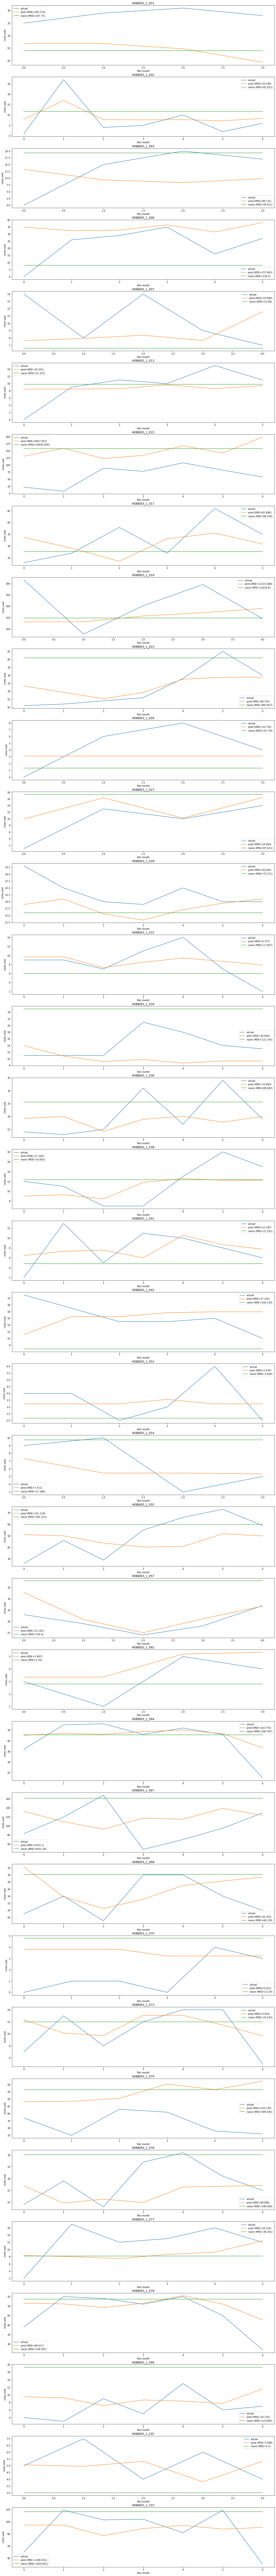

In [38]:
# Plot product predictions for cases where they beat naive model

from matplotlib.backends.backend_pdf import PdfPages

pp = PdfPages('plots.pdf')

plot_rows = len(output)
fig, ax = plt.subplots(nrows=plot_rows,ncols=1,figsize = (20,200))

counter = 0

for ID in output:

    X_test['monthly_rolling_mean_'+str(window)] = 0

    X_test_single = X_test[X_test['item_id']==ID].reset_index().drop(columns='index')

    valid_single = valid_df[valid_df['item_id']==ID]

    x = X_test_single.iloc[[0]]
    x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
    X_test_single = X_test_single.drop(index=0)
    X_test_single = pd.concat([x,X_test_single])

    y_pred = []

    for i in range(0,window):

        x = X_test_single.iloc[[i]]

        if i!=0:
            x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window

        y = model.predict(x)[0]
        y_pred.append(y)

        prev_sales = valid_single.tail(window-(i+1))['units_sold'].to_numpy()

    rows = X_test_single.shape[0]

    for i in range(window,rows):
        x = X_test_single.iloc[[i]]
        x['monthly_rolling_mean_'+str(window)] = np.sum(y_pred[i-window:i])/window
        y = model.predict(x)[0]
        y_pred.append(y)

    single_item_actuals_df = test_df[test_df['item_id']==ID]
    y_actual = single_item_actuals_df['units_sold'].to_numpy()

    naive_window = 6

    y_naive = valid_single.tail(naive_window).units_sold.mean()*np.ones(len(y_actual))

    y_pred_MSE = round(mean_squared_error(y_actual,y_pred),3)
    y_naive_MSE = round(mean_squared_error(y_actual,y_naive),3)
    
    ax[counter].set_title(ID)
    ax[counter].set_xlabel('Test month')
    ax[counter].set_ylabel('Units sold')

    ax[counter].plot(y_actual,label='actual')
    ax[counter].plot(y_pred,label='pred (MSE='+str(y_pred_MSE)+')')
    ax[counter].plot(y_naive,label='naive (MSE='+str(y_naive_MSE)+')')

    ax[counter].legend()
    
    counter += 1

pp.savefig(fig)
pp.close()

In [ ]:
################################################################################################################################

In [ ]:
# Make product-level predictions

In [26]:
# Add in rolling mean column for test df

X_test['monthly_rolling_mean_'+str(window)] = 0
X_test

,item_id,avg_sell_price,units_sold_monthly_mean,monthly_rolling_mean_3
0,HOBBIES_1_001,8.260,16.5,0
1,HOBBIES_1_001,8.260,17.5,0
2,HOBBIES_1_001,8.348,15.0,0
3,HOBBIES_1_001,8.380,6.5,0
4,HOBBIES_1_002,3.970,6.5,0
...,...,...,...,...
601,HOBBIES_1_103,0.700,123.6,0
602,HOBBIES_1_103,0.700,109.0,0
603,HOBBIES_1_104,23.980,3.5,0
604,HOBBIES_1_104,23.980,7.0,0


In [27]:
# Slice test df for item of interest

item_id = 'HOBBIES_1_045'
X_test_single = X_test[X_test['item_id']==item_id].reset_index().drop(columns='index')

X_test_single

,item_id,avg_sell_price,units_sold_monthly_mean,monthly_rolling_mean_3
0,HOBBIES_1_045,10.58,14.0,0
1,HOBBIES_1_045,10.58,11.0,0
2,HOBBIES_1_045,10.58,11.0,0


In [28]:
# Slice validation df for item of interest

valid_single = valid_df[valid_df['item_id']==item_id]
valid_single

,item_id,units_sold,avg_sell_price,units_sold_monthly_mean,monthly_rolling_mean_3
288,HOBBIES_1_045,15,10.58,15.0,0.0
289,HOBBIES_1_045,19,10.58,19.0,0.0
290,HOBBIES_1_045,4,10.58,4.0,0.0


In [ ]:
# Insert rolling mean for first test date

x = X_test_single.iloc[[0]]
x['monthly_rolling_mean_'+str(window)] = valid_single.tail(window).units_sold.mean()
X_test_single = X_test_single.drop(index=0)
X_test_single = pd.concat([x,X_test_single])

X_test_single

In [ ]:
# Recursively predict sales for test days where rolling mean must be calculated using validation df

y_pred = []

if valid_single.shape[0] < window or X_test_single.shape[0] < window:
    
    print('BROKE!')

else:

    for i in range(0,window):

        x = X_test_single.iloc[[i]]

        if i!=0:
            x['monthly_rolling_mean_'+str(window)] = ( prev_sales.sum() + np.sum(y_pred) )/window

        y = model.predict(x)[0]
        y_pred.append(y)

        prev_sales = valid_single.tail(window-(i+1))['units_sold'].to_numpy()

y_pred

In [ ]:
# Recursively predict sales for rest of test days

rows = X_test_single.shape[0]

for i in range(window,rows):
    x = X_test_single.iloc[[i]]
    x['monthly_rolling_mean_'+str(window)] = np.sum(y_pred[i-window:i])/window
    y = model.predict(x)[0]
    y_pred.append(y)

y_pred

In [ ]:
################################################################################################################################

In [ ]:
# Get actuals

single_item_actuals_df = test_df[test_df['item_id']==item_id]
y_actual = single_item_actuals_df['units_sold'].to_numpy()

y_actual

In [ ]:
# Plot predictions vs actuals

naive_window = 6

y_naive = valid_single.tail(naive_window).units_sold.mean()*np.ones(len(y_actual))

y_pred_MSE = round(mean_squared_error(y_actual,y_pred),3)
y_naive_MSE = round(mean_squared_error(y_actual,y_naive),3)

figure(figsize=(20, 10))

plt.plot(y_actual,label='actual')
plt.plot(y_pred,label='pred (MSE='+str(y_pred_MSE)+')')
plt.plot(y_naive,label='mean pre-test (MSE='+str(y_naive_MSE)+')')

plt.legend()

In [ ]:
################################################################################################################################

In [ ]:
# Rough work

In [ ]:
# Let's take a look at a single product's sales

# item_id = 'HOBBIES_1_012'
df2 = df[df['item_id']==item_id]

df2 = df2[['date','units_sold']]
df2 = df2.set_index('date')

df2

In [ ]:
# Decompose time series and plot

from statsmodels.tsa.seasonal import seasonal_decompose

decomp_viz = seasonal_decompose(df2)

fig = decomp_viz.plot()
fig.set_size_inches((20, 20))
fig.tight_layout()
plt.show()